In [1]:
import discretisedfield as df
import micromagneticmodel as mm
import numpy as np
import oommfc as oc
from montecarlo.System import System

In [16]:
region = df.Region(p1=(-50e-9, -50e-9, -10e-9), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(2.5e-9, 2.5e-9, 2.5e-9))
system = mm.System(name='skyrmion')


In [17]:
system = mm.System(name='skyrmion')

system.energy = (mm.Exchange(A=1.6e-11)
               + mm.DMI(D=4e-3, crystalclass='Cnv_z')
               + mm.UniaxialAnisotropy(K=0.51e6, u=(0, 0, 1))
               + mm.Demag()
               + mm.Zeeman(H=(0, 0, 2e5)))

/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: divide by zero encountered in scalar divide
  length = a * (widthu_per_lenu / (self.scale * self.width))
/Users/gmn22/miniconda3/envs/irp/lib/python3.8/site-packages/matplotlib/quiver.py:646: RuntimeWarning: invalid value encountered in multiply
  length = a * (widthu_per_lenu / (self.scale * self.width))


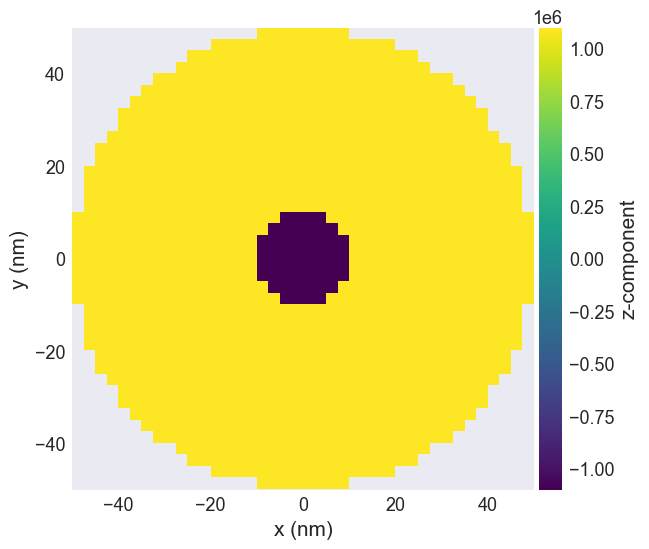

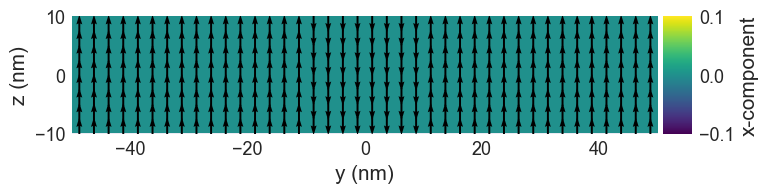

In [18]:
Ms = 1.1e6

def Ms_fun(pos):
    """Function to set magnitude of magnetisation: zero outside cylindric shape,
    Ms inside cylinder.

    Cylinder radius is 50nm.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 50e-9:
        return Ms
    else:
        return 0

def m_init(pos):
    """Function to set initial magnetisation direction:
    -z inside cylinder (r=10nm),
    +z outside cylinder.
    y-component to break symmetry.

    """
    x, y, z = pos
    if (x**2 + y**2)**0.5 < 10e-9:
        return (0, 0, -1)
    else:
        return (0, 0, 1)



# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=m_init, norm=Ms_fun)
system.m.plane('z').mpl()
system.m.plane('x').mpl()

In [19]:
data = System(system=system, Ms=Ms, schedule_name='skyrmion', schedule={'type':'FC', 'start_temp':10.01, 'end_temp':0.01, 'steps':10})

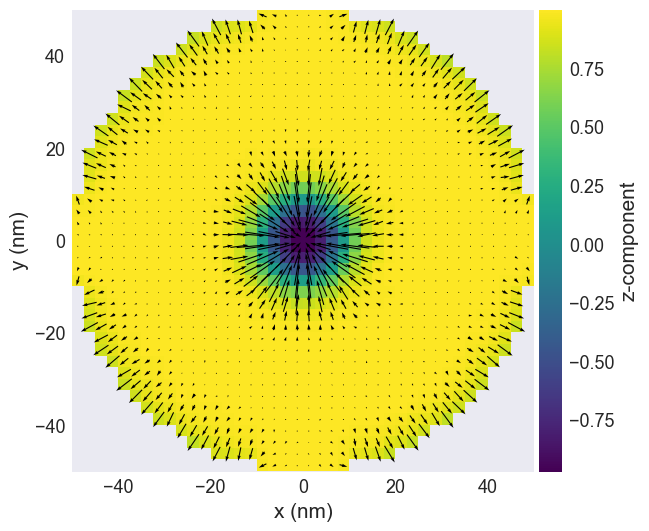

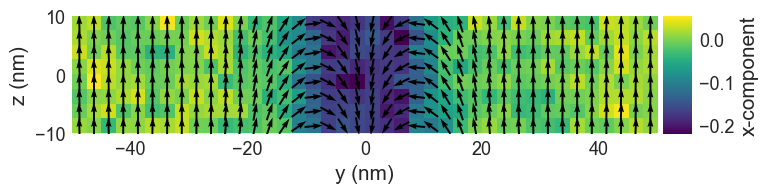

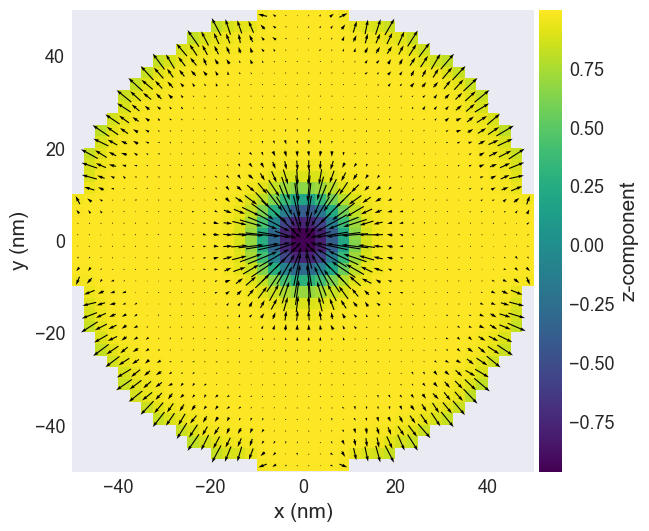

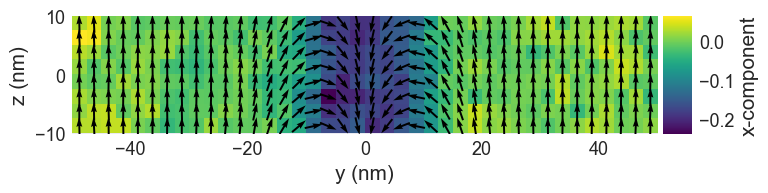

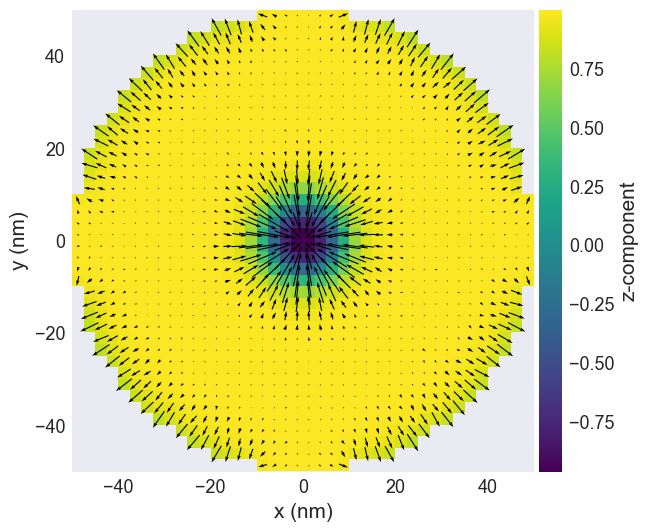

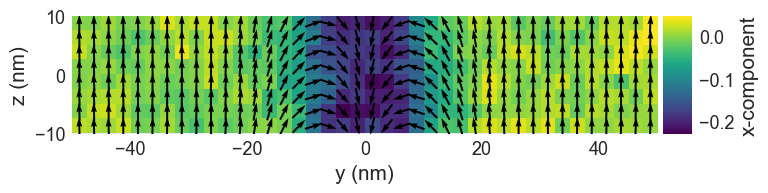

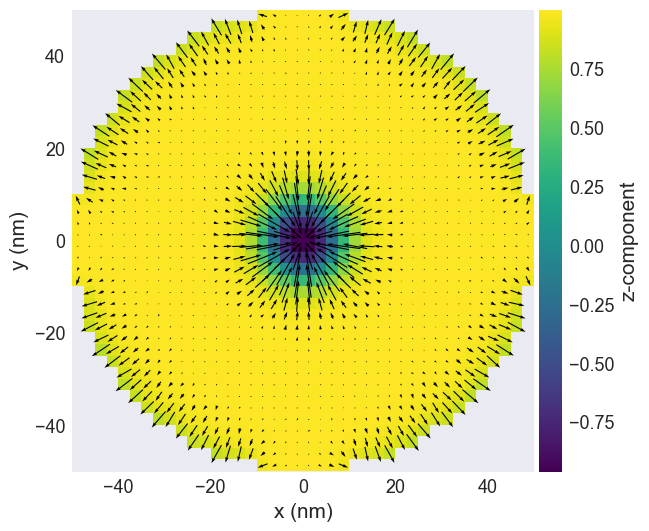

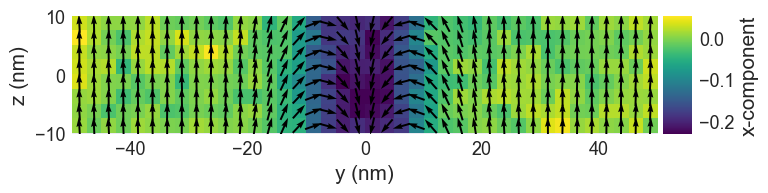

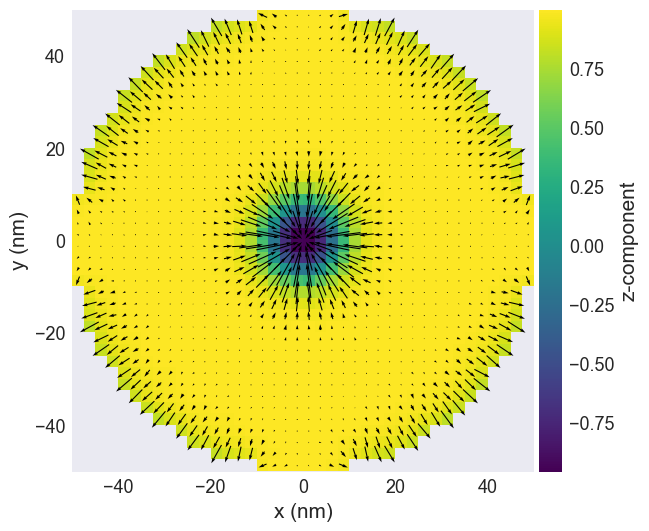

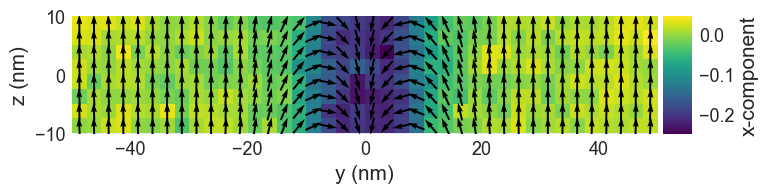

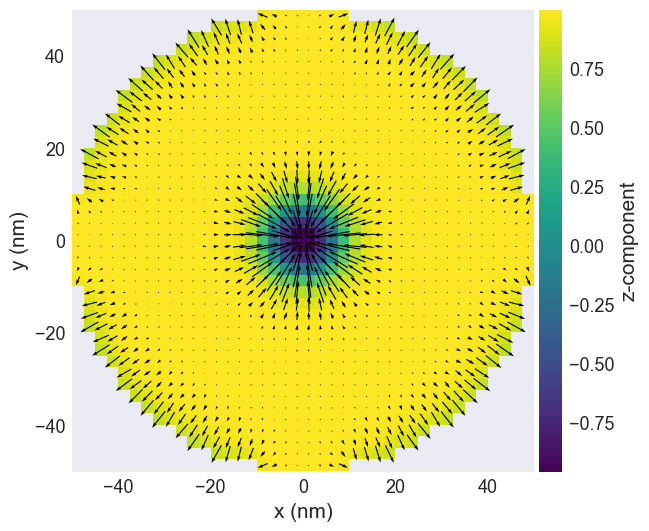

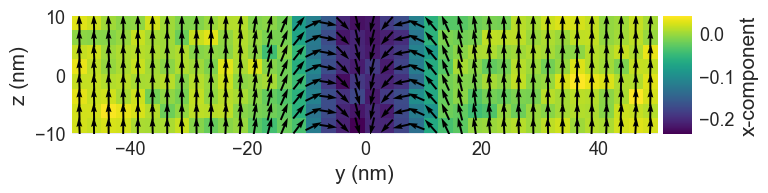

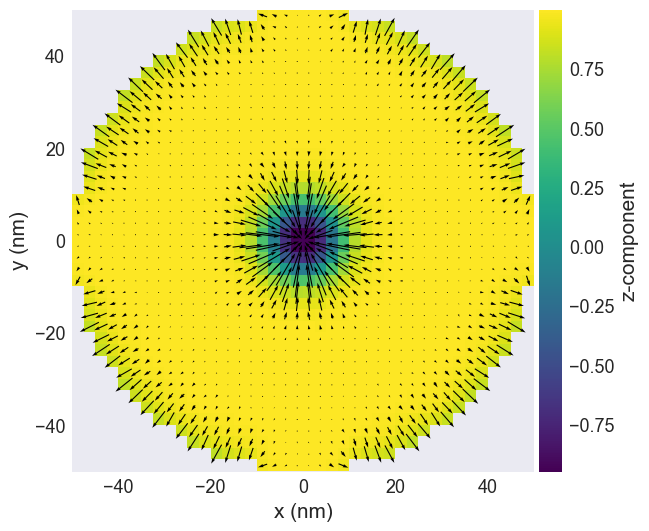

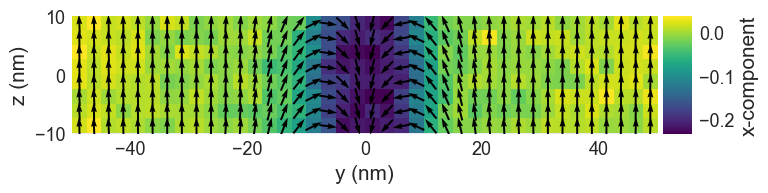

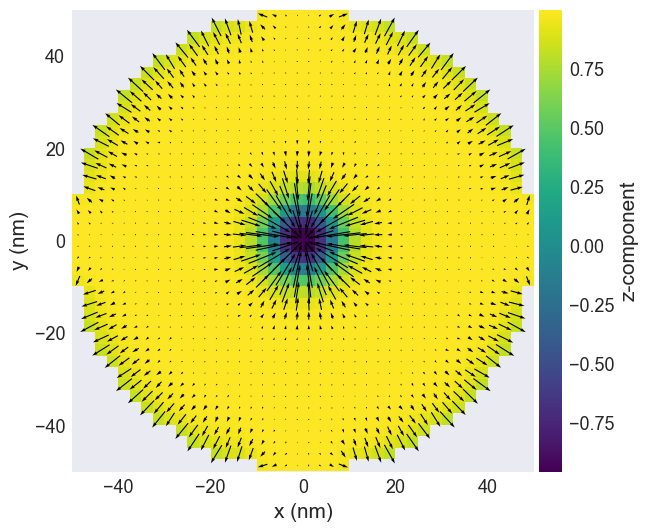

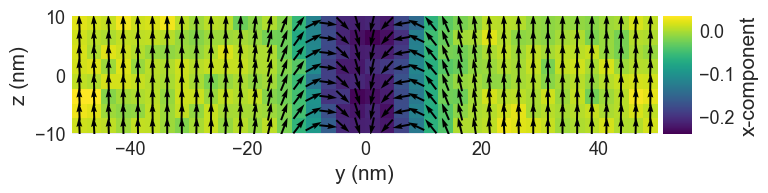

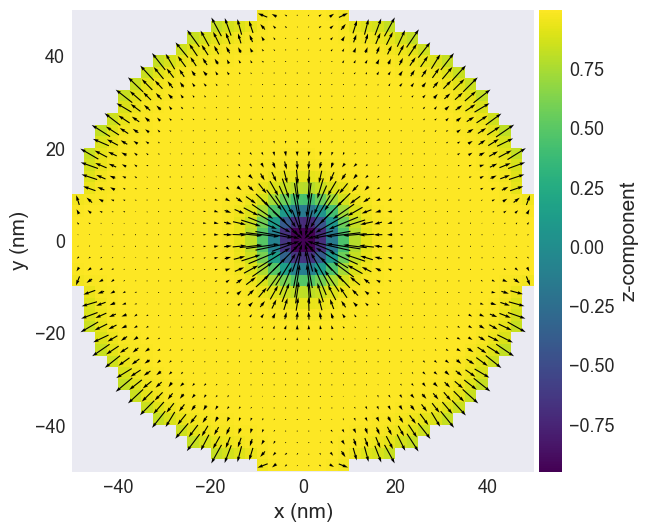

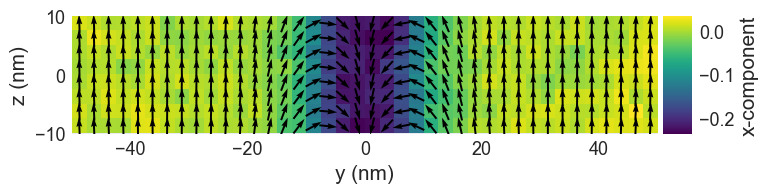

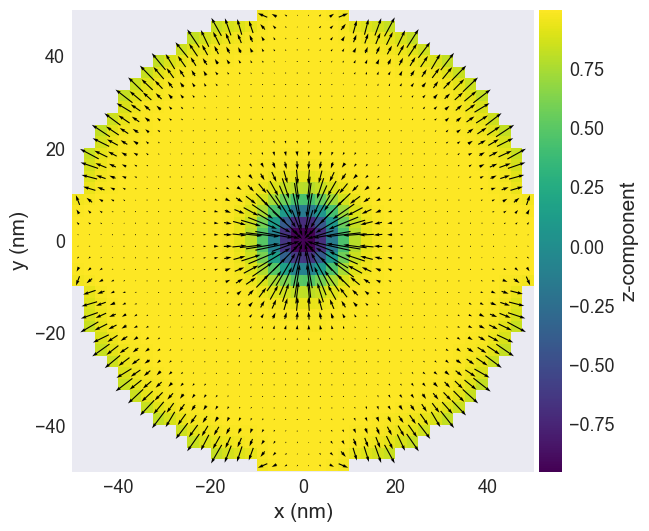

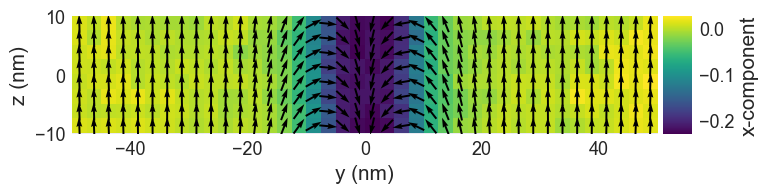

In [20]:
data.simulate(5000000);